# 素朴にTensorで実装してみる

In [2]:
import torch

In [ ]:
# 真の回帰係数
w_true = torch.Tensor([1, 2, 3])

# Xのデータの準備
X = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1)

# 真のモデルから生成された値
y = torch.mv(X, w_true) + torch.randn(100) * 0.5

# 最適化するためのパラメータのTensorを乱数で初期化
w = torch.randn(3, requires_grad=True)

# 学習率
gamma = 0.1

In [3]:
losses = []

for epoc in range(100):

  w.grad = None

  y_pred = torch.mv(X, w)


  # 損失関数の定義
  loss = torch.mean((y - y_pred) ** 2)

  # 微分
  loss.backward()

  # 計算グラフを保持したまま, dataのみを更新する
  w.data = w.data - gamma * w.grad

  losses.append(loss.item())

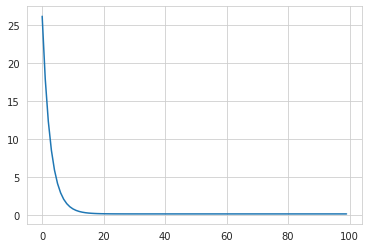

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.plot(losses);

In [12]:
w

tensor([1.1199, 2.0149, 3.0386], requires_grad=True)

## torch.nn, torch.optimを使って書いてみる

In [14]:
from torch import nn, optim

# 線形レイヤを作成. inputを3次元, outputを1次元, 切片はなし
net = nn.Linear(in_features=3, out_features=1, bias=False)

# optimizerに定義したネットワークのパラメータを渡して初期化
optimizer = optim.SGD(net.parameters(), lr=0.1)

# MSE Loss インスタンスを作成
loss_fn = nn.MSELoss()

In [15]:
losses = []

for epoc in range(100):

  # ループの度に初期化する
  optimizer.zero_grad()

  # データを元に予測値を算出する
  y_pred = net(X)

  # y_predの形をyのtensorの形を揃える
  loss = loss_fn(y_pred.view_as(y), y)

  # 自動微分
  loss.backward()

  # 最適化更新
  optimizer.step()

  # 更新した値をリストに追加
  losses.append(loss.item())

In [16]:
list(net.parameters())

[Parameter containing:
 tensor([[1.1199, 2.0149, 3.0386]], requires_grad=True)]

### ロジスティック回帰を実装する

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[:100]
y = iris.target[:100]

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [20]:
net = nn.Linear(4, 1)

loss_fn = nn.BCEWithLogitsLoss()

optimizer = optim.SGD(net.parameters(), lr=0.25)

In [21]:
losses = []

for epoc in range(100):

  optimizer.zero_grad()

  y_pred = net(X)

  loss = loss_fn(y_pred.view_as(y), y)
  loss.backward()

  optimizer.step()

  losses.append(loss.item())


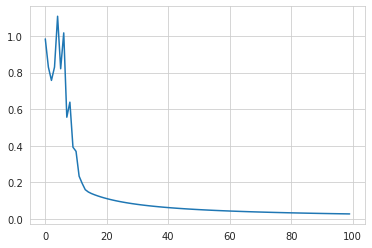

In [22]:
sns.set_style("whitegrid")
plt.plot(losses);

In [23]:
h = net(X)

prob = torch.sigmoid(h)

y_pred = prob > 0.5

(y.bool() == y_pred.view_as(y)).sum().item()

100

### 他クラスのロジスティック回帰

In [24]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

net = nn.Linear(X.size()[1], 10)

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.01)

In [26]:
losses = []

for epoc in range(100):

  optimizer.zero_grad()

  y_pred = net(X)

  loss = loss_fn(y_pred, y)
  loss.backward()

  optimizer.step()

  losses.append(loss.item())

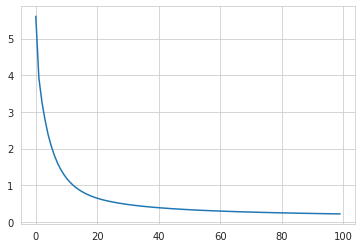

In [27]:
plt.plot(losses);

In [28]:
_, y_pred = torch.max(net(X), 1)

(y_pred == y).sum().item() / len(y)

0.9454646633277685